In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numerik.ode import explicit_runge, explicit_heun, explicit_runge_kutta

In [8]:
def plot_error(explicit_method, ya, title, x0, y0, x_end, f):
    n = 10**np.linspace(2,5)
    hs = 2/n
    err = []
    for h in hs:
        x, y = explicit_method(x_end, h, x0, y0, f)
        err.append(np.linalg.norm(y-ya(x),np.inf))
    
    plt.title(title)
    plt.loglog(hs,err,'-')
    plt.xlabel('h')
    plt.ylabel(r'$\max_k \|e(x_k,h)\|$')
    plt.grid()
    plt.show()

In [9]:
def plot_comparison(ya, title, x0, y0, x_end, f, h, y_min = 0, y_max = 1):
    x, y = explicit_runge(x_end, h, x0, y0, f)
    plt.plot(x,y,'--', label="Explicit Runge")
    
    x, y = explicit_heun(x_end, h, x0, y0, f)
    plt.plot(x,y,'--', label="Explicit Heun")
    
    x, y = explicit_runge_kutta(x_end, h, x0, y0, f)
    plt.plot(x,y,'--', label="Explicit Runge Kutta 4")
    
    x = np.linspace(x0, x_end, 100)
    y = ya(x)
    plt.plot(x, y, label="Analytical")
    
    plt.ylabel("y")
    plt.xlabel("x")
    
    x = np.linspace(x0, x_end, 10)
    y = np.linspace(y_min, y_max, 10)
    xv, yv = np.meshgrid(x, y)
    
    plt.quiver(xv, yv, np.ones_like(xv), f(xv, yv), angles="xy")
    plt.title(f"{title} (h={h:.6f})")
    plt.legend()
    plt.show()

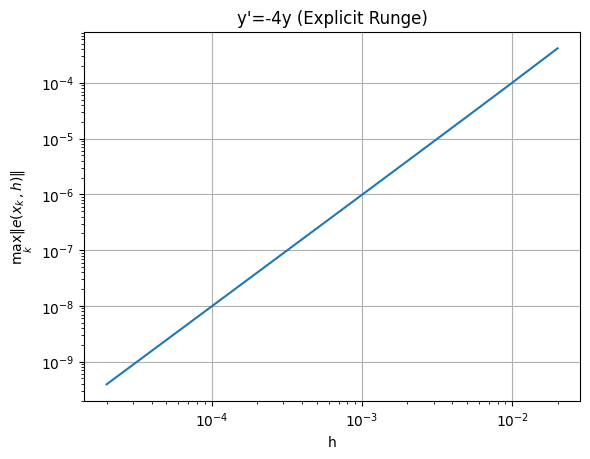

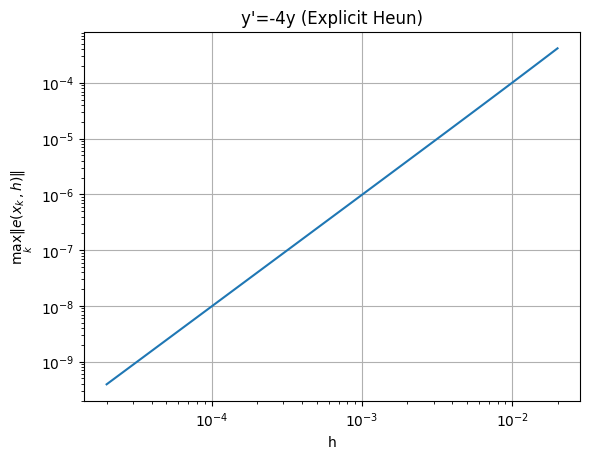

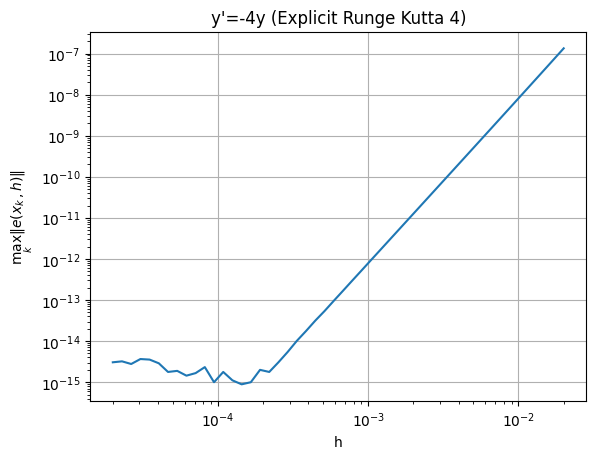

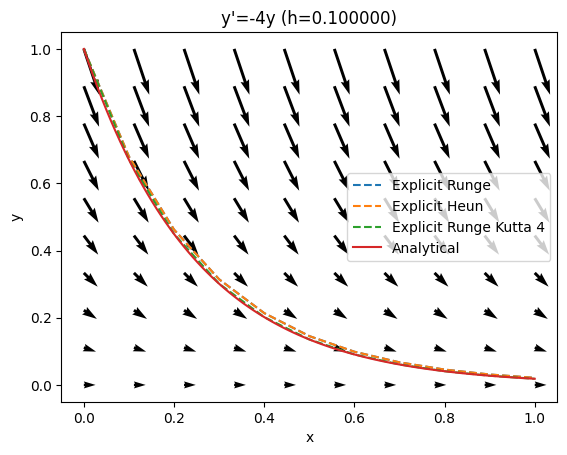

In [10]:
def plot_problem_1():
    f = lambda x, y: -4*y
    df = lambda x, y: -4
    ya = lambda x: np.exp(-4*x)
    
    x0 = 0
    y0 = 1
    x_end = 1
    
    plot_error(explicit_method=explicit_runge, ya=ya, title="y'=-4y (Explicit Runge)", x0=x0, y0=y0, x_end=x_end, f=f)
    plot_error(explicit_method=explicit_heun, ya=ya, title="y'=-4y (Explicit Heun)", x0=x0, y0=y0, x_end=x_end, f=f)
    plot_error(explicit_method=explicit_runge_kutta, ya=ya, title="y'=-4y (Explicit Runge Kutta 4)", x0=x0, y0=y0, x_end=x_end, f=f)
    
    plot_comparison(ya=ya, title="y'=-4y", x0=x0, y0=y0, x_end=x_end, f=f, h=0.1)
    
plot_problem_1()

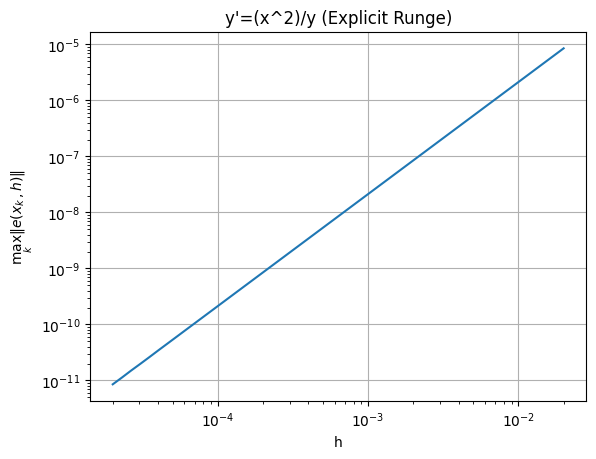

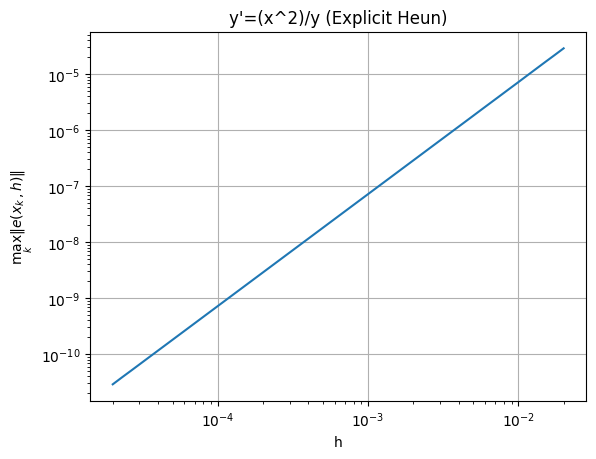

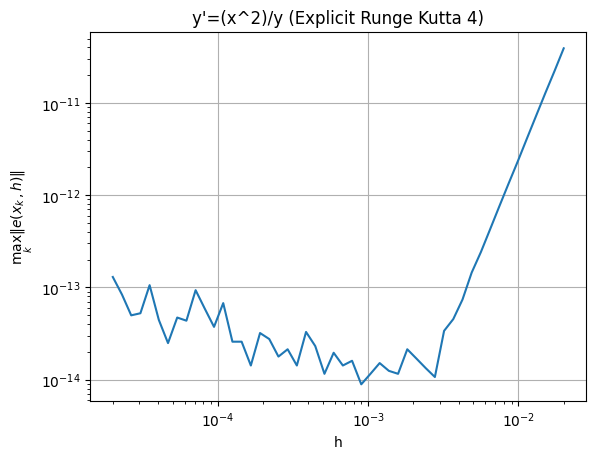

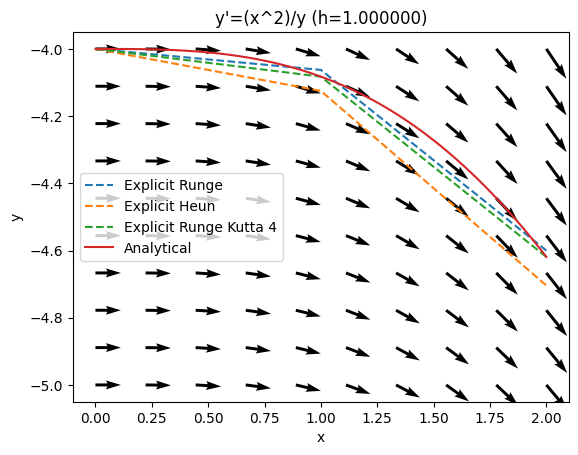

In [14]:
def plot_problem_2():
    f = lambda x, y: (x**2)/y
    ya = lambda x: -np.sqrt((2*x**3)/3+16)
    
    x0 = 0
    y0 = -4
    x_end = 2
    
    plot_error(explicit_method=explicit_runge, ya=ya, title="y'=(x^2)/y (Explicit Runge)", x0=x0, y0=y0, x_end=x_end, f=f)
    plot_error(explicit_method=explicit_heun, ya=ya, title="y'=(x^2)/y (Explicit Heun)", x0=x0, y0=y0, x_end=x_end, f=f)
    plot_error(explicit_method=explicit_runge_kutta, ya=ya, title="y'=(x^2)/y (Explicit Runge Kutta 4)", x0=x0, y0=y0, x_end=x_end, f=f)
    
    plot_comparison(ya=ya, title="y'=(x^2)/y", x0=x0, y0=y0, x_end=x_end, f=f, h=1, y_min=-5, y_max=-4)
    
plot_problem_2()